<a href="https://colab.research.google.com/github/priyanshu19042005/daiassignment/blob/main/DAI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
# Load the dataset
df = pd.read_csv("/content/cardetails.csv")

# Inspect basic structure
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Dataset shape: (2059, 20)
Columns: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       

In [11]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("First 5 rows:")
print(df.head())

# 2. Check Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())

# 3. Data Cleaning

## a. Handle Missing Values
# Numeric columns: fill missing values with median (avoiding chained assignment warnings)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric columns:", numeric_cols)
for col in numeric_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled {missing_count} missing values in '{col}' with median value {median_val}")

# Categorical columns: fill missing values with mode if needed
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled {missing_count} missing values in '{col}' with mode value '{mode_val}'")

## b. Remove Duplicate Records
initial_shape = df.shape
df = df.drop_duplicates()
print(f"\nRemoved duplicates. Shape changed from {initial_shape} to {df.shape}")

## c. Outlier Detection and Treatment using IQR method
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = dataframe.shape[0]
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    final_count = dataframe.shape[0]
    print(f"{column}: Removed {initial_count - final_count} outliers")
    return dataframe

# Apply outlier removal on all numeric columns
for col in numeric_cols:
    df = remove_outliers(df, col)

## d. Standardize Categorical Values (strip extra spaces and convert to lowercase)
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

print("\nCleaned dataset shape:", df.shape)
print("Missing values after cleaning:")
print(df.isnull().sum())

# df.to_csv("cleaned_car_details.csv", index=False)



Dataset shape: (1290, 20)
Columns: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']
First 5 rows:
            Make                 Model   Price  Year  Kilometer Fuel Type  \
0          honda   amaze 1.2 vx i-vtec  505000  2017      87150    petrol   
1  maruti suzuki       swift dzire vdi  450000  2014      75000    diesel   
2        hyundai  i10 magna 1.2 kappa2  220000  2011      67000    petrol   
3         toyota              glanza g  799000  2019      37500    petrol   
5  maruti suzuki              ciaz zxi  675000  2017      73315    petrol   

  Transmission   Location   Color   Owner Seller Type   Engine  \
0       manual       pune    grey   first   corporate  1198 cc   
1       manual   ludhiana   white  second  individual  1248 cc   
2       manual    lucknow  maroon   first  ind


Summary statistics for numeric columns:
              Price         Year      Kilometer       Length        Width  \
count  1.135000e+03  1135.000000    1135.000000  1135.000000  1135.000000   
mean   7.584669e+05  2016.321586   51478.110132  4122.261674  1726.075771   
std    4.405105e+05     3.060763   26055.231572   304.311069    65.520407   
min    1.149990e+05  2008.000000     600.000000  3429.000000  1560.000000   
25%    4.425000e+05  2014.000000   32000.000000  3970.000000  1694.500000   
50%    6.250000e+05  2017.000000   50197.000000  3995.000000  1730.000000   
75%    9.500000e+05  2019.000000   70000.000000  4384.000000  1780.000000   
max    2.145000e+06  2022.000000  126535.000000  4915.000000  1894.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1135.000000            1135.0         1135.000000  
mean   1543.674009               5.0           45.141850  
std      70.301576               0.0            8.226413  
min    1370.000000           

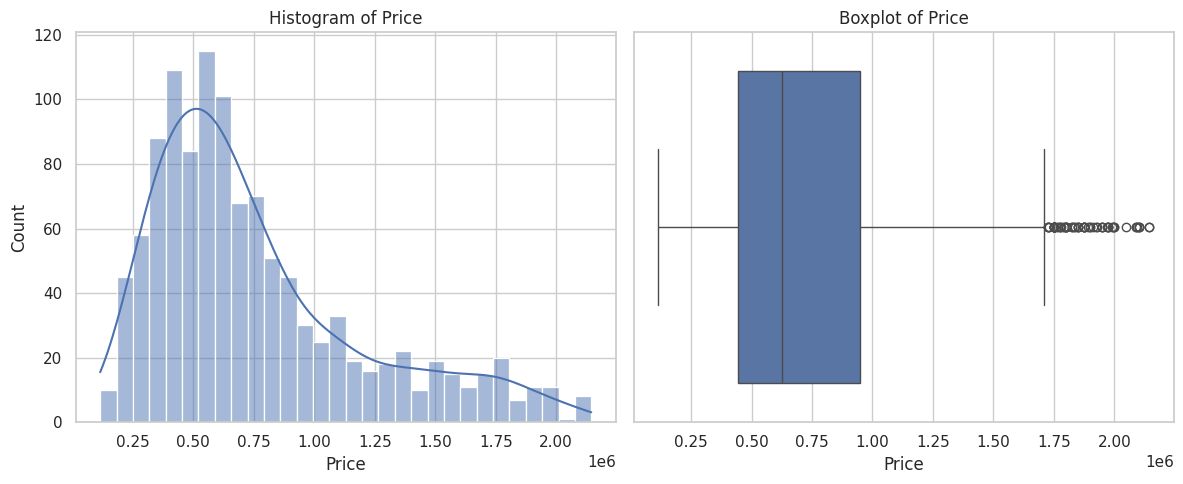

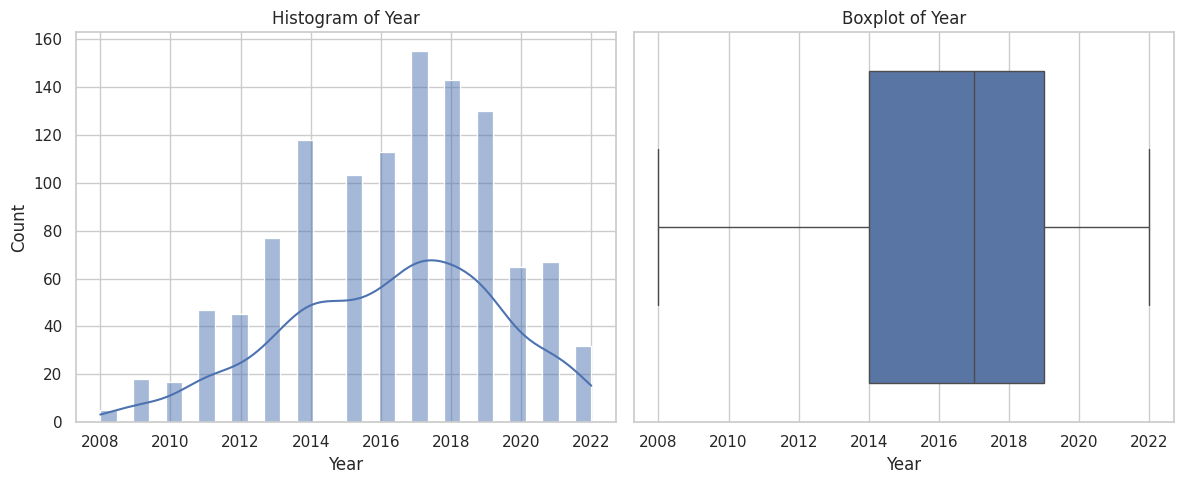

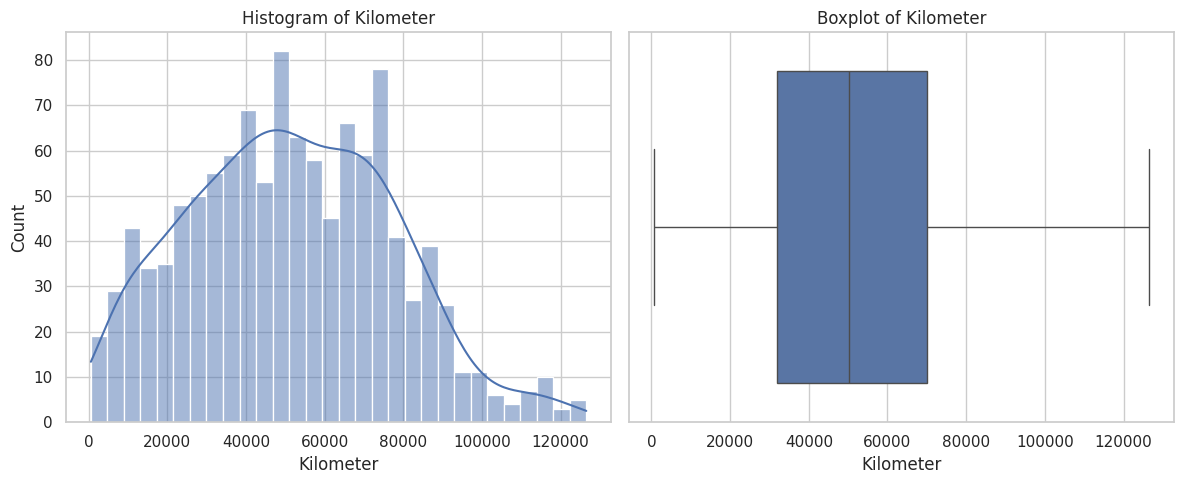

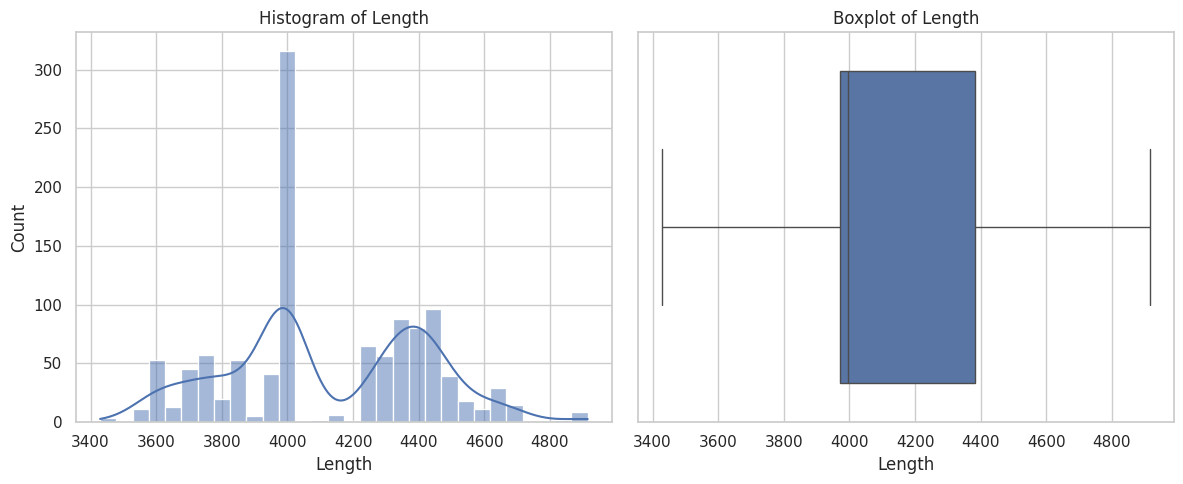

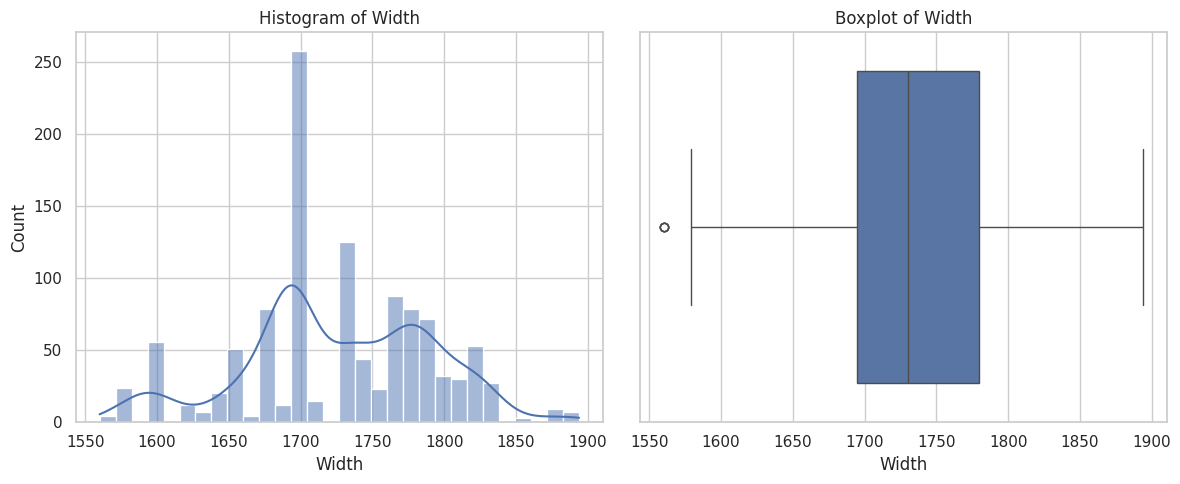

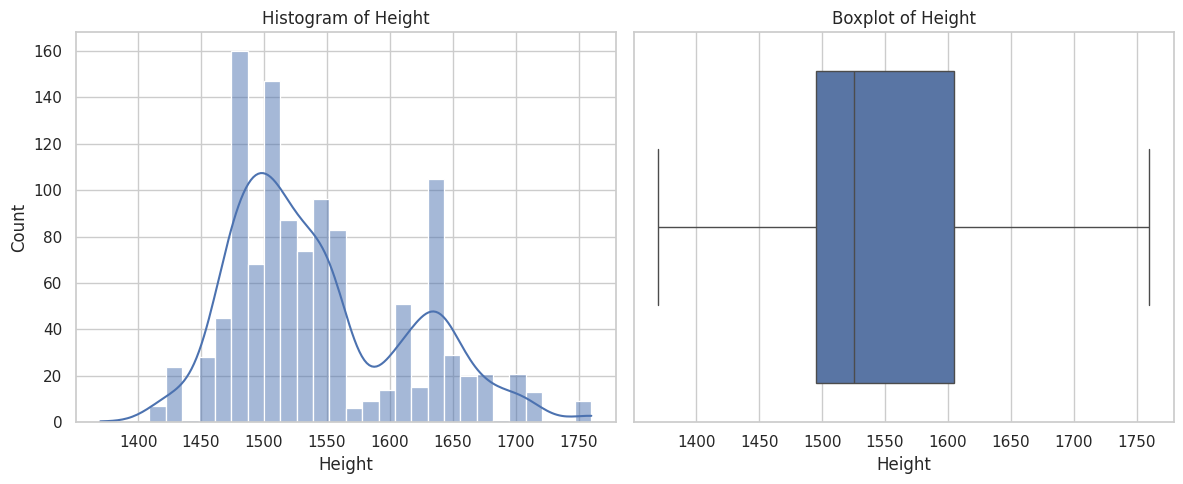

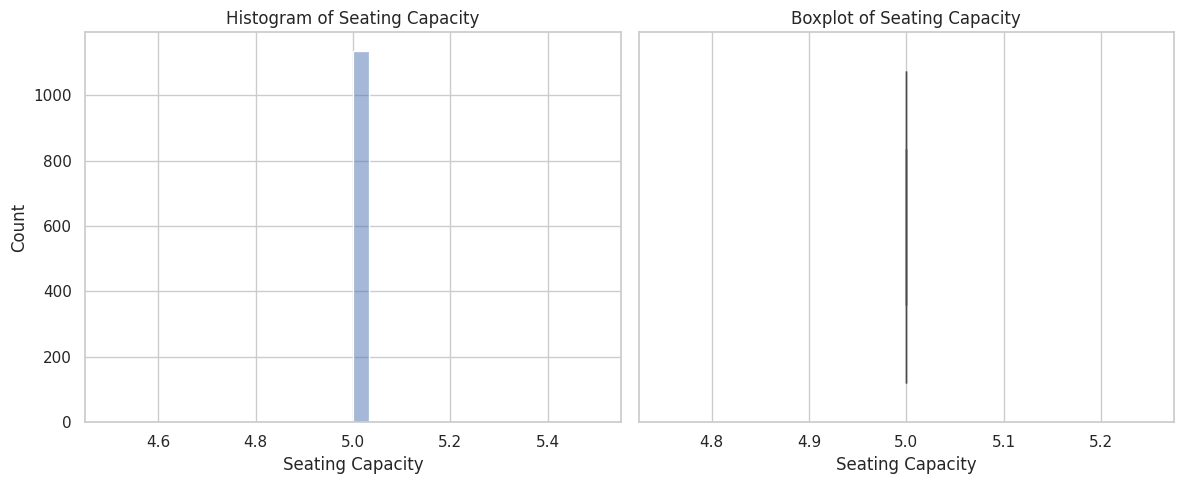

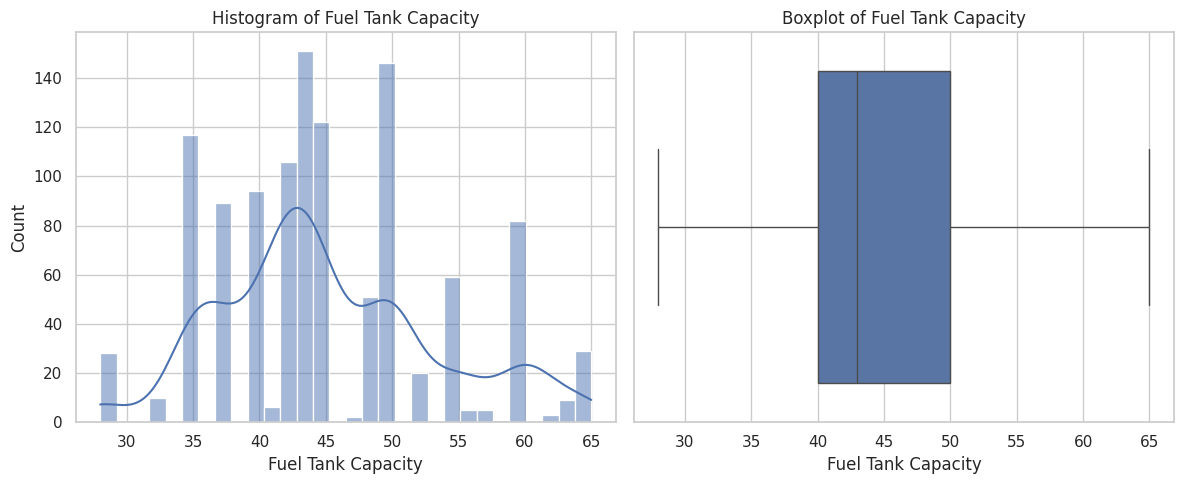

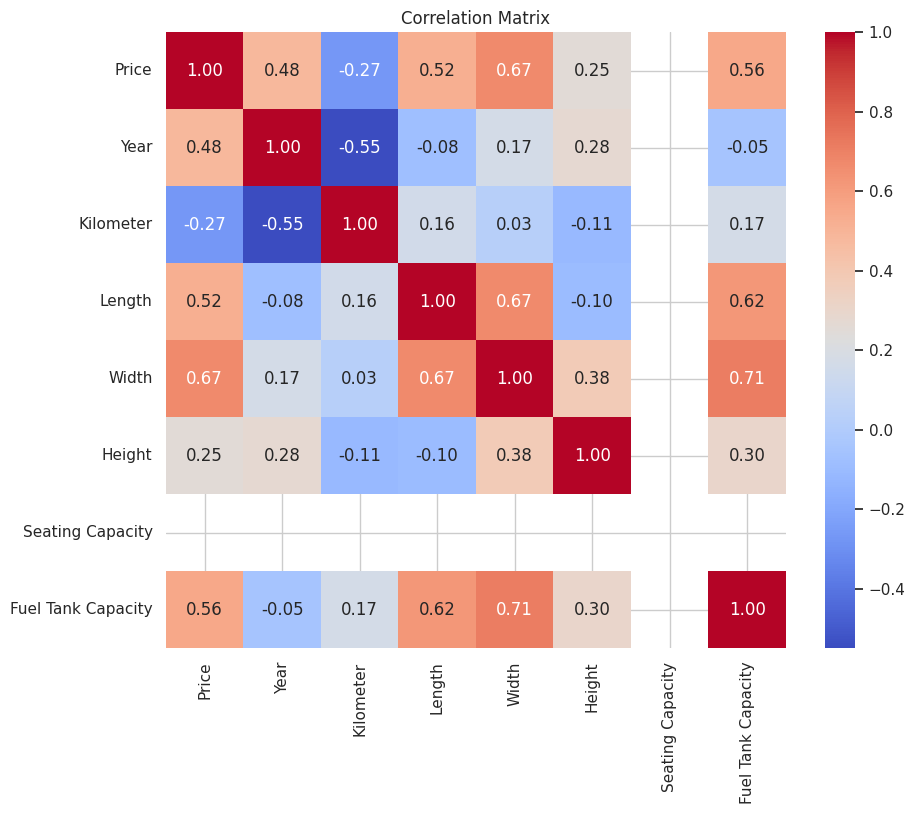

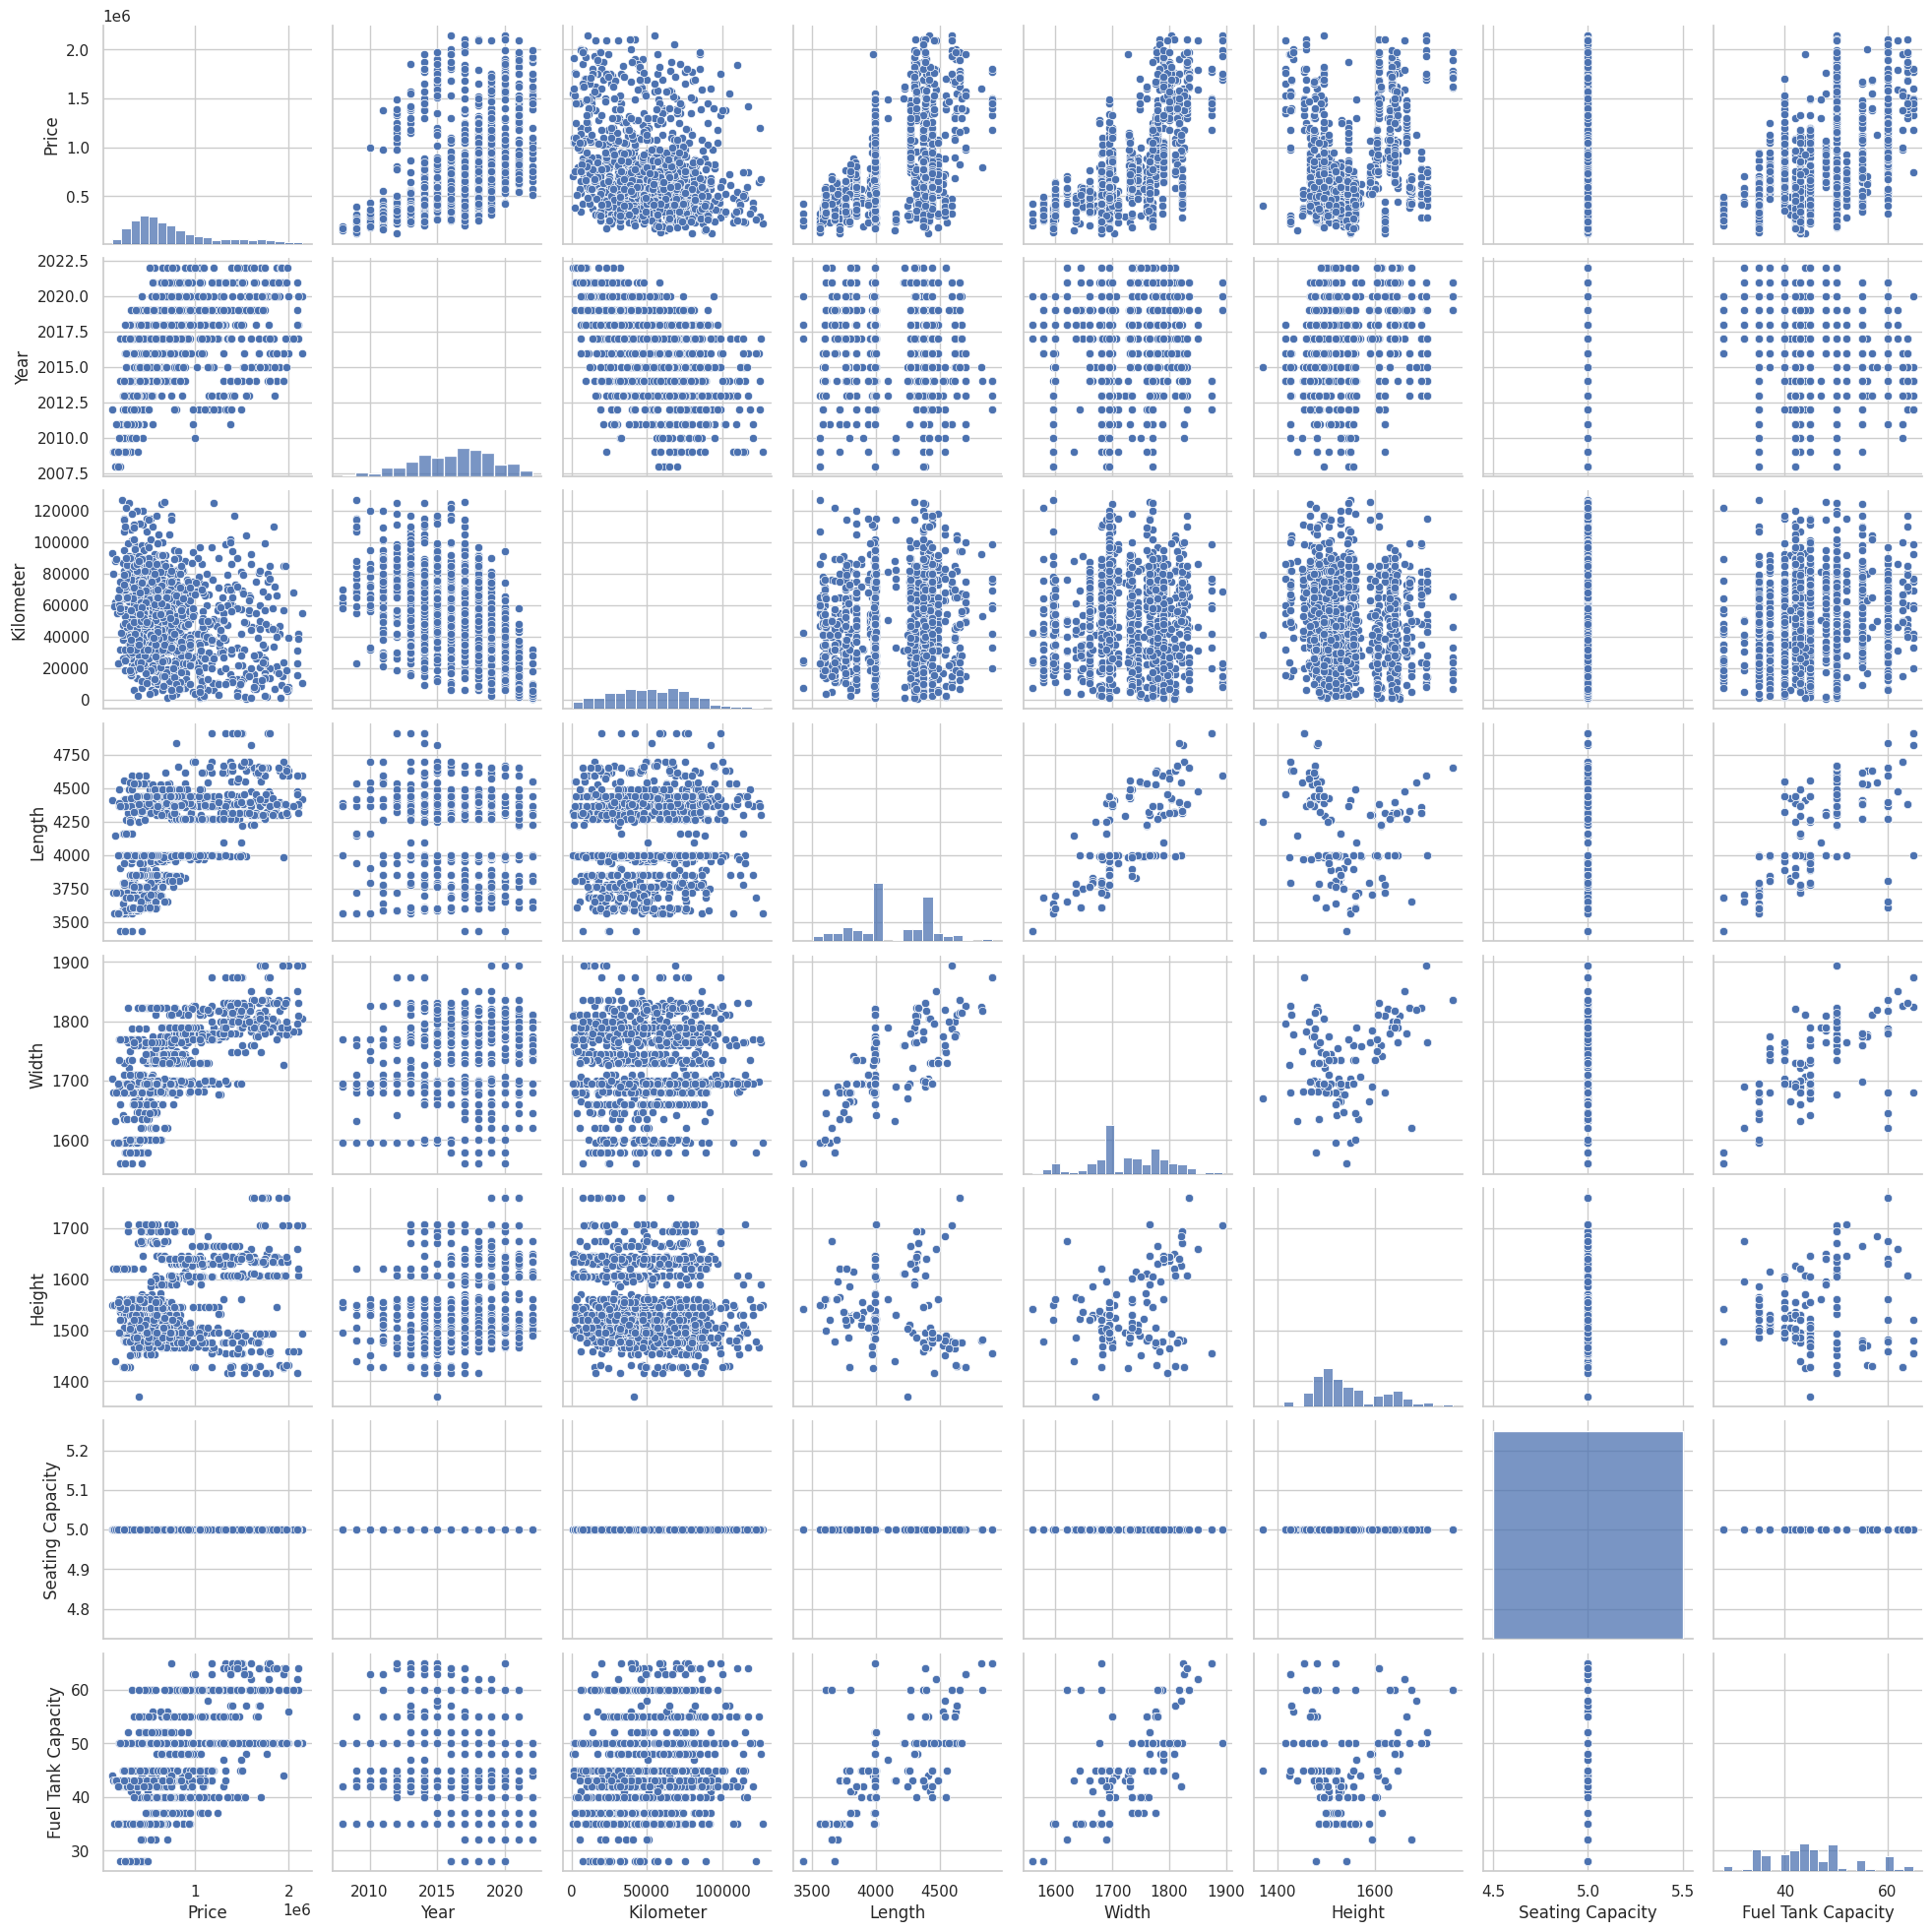

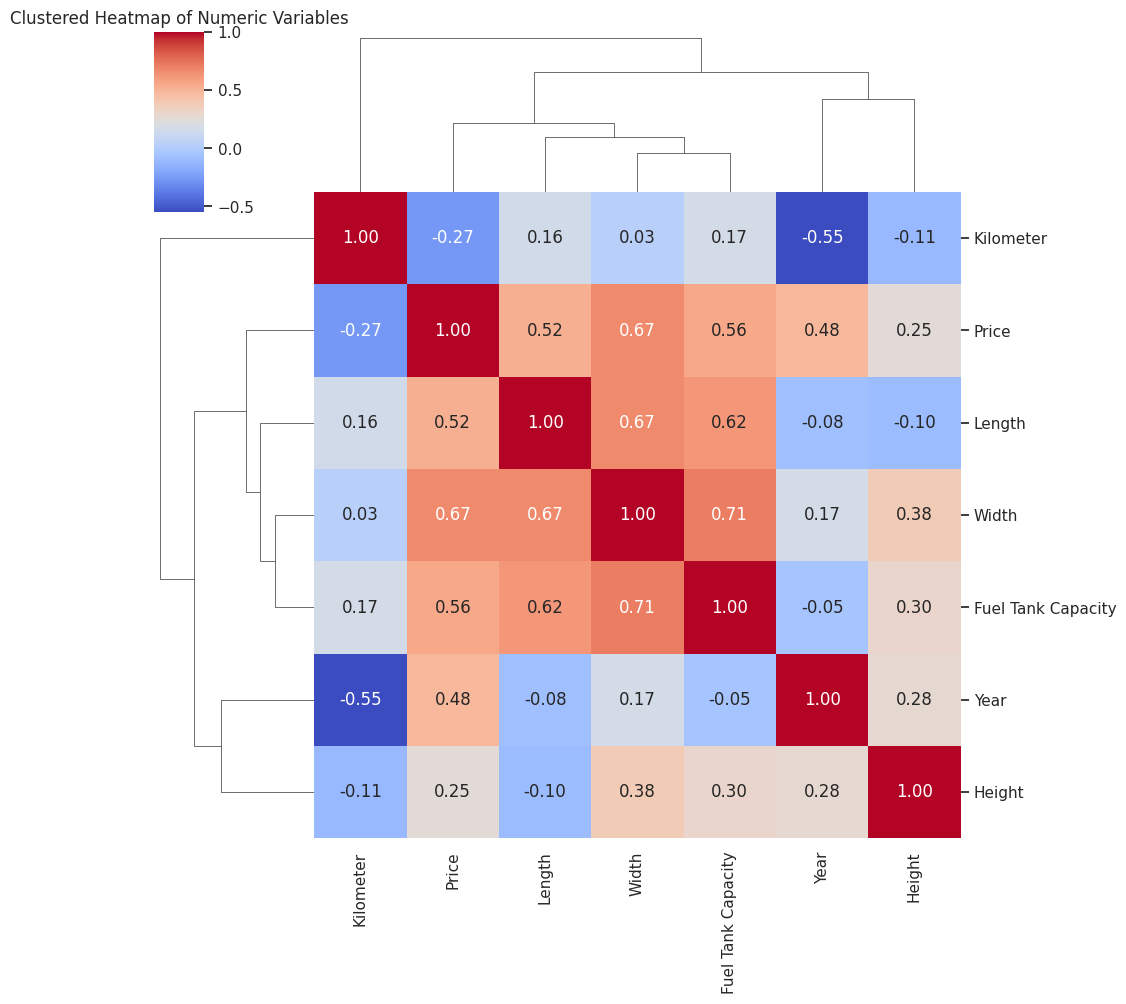

In [12]:
# 4. Exploratory Data Analysis (EDA)

## a. Univariate Analysis

# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df[numeric_cols].describe())

# Calculate and print skewness for numeric columns
print("\nSkewness of numeric columns:")
print(df[numeric_cols].skew())

# Frequency distributions for categorical variables
for col in cat_cols:
    print(f"\nFrequency distribution for '{col}':")
    print(df[col].value_counts())

# Histograms and box plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

## b. Bivariate Analysis

# Correlation Matrix with Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter Plot: Example - Kilometer vs Price (if columns exist)
if 'kilometer' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df['kilometer'], y=df['Price'])
    plt.title("Scatter Plot: Kilometer vs Price")
    plt.xlabel("Kilometer")
    plt.ylabel("Price")
    plt.show()

# Box Plot: Compare Price by Make (assuming 'make' is standardized)
if 'make' in df.columns and 'Price' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='make', y='Price', data=df)
    plt.title("Boxplot: Price by Make")
    plt.xticks(rotation=45)
    plt.show()

## c. Multivariate Analysis

# Pair Plot for numeric variables
sns.pairplot(df[numeric_cols])
plt.show()

# Clustered Heatmap:
# Remove constant numeric columns (those with zero standard deviation) to avoid NaN values.
non_constant_numeric_cols = [col for col in numeric_cols if df[col].std() > 0]
corr_matrix_non_constant = df[non_constant_numeric_cols].corr()
# Fill any remaining NaN values with 0 (shouldn't be necessary, but as a safeguard)
corr_matrix_non_constant = corr_matrix_non_constant.fillna(0)
sns.clustermap(corr_matrix_non_constant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Clustered Heatmap of Numeric Variables")
plt.show()

# Grouped Comparisons: Average Price by Make
if 'make' in df.columns and 'Price' in df.columns:
    make_group = df.groupby('make')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
    print("\nAverage Price by Make:")
    print(make_group)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='make', y='Price', data=make_group)
    plt.title("Average Price by Make")
    plt.xticks(rotation=45)
    plt.show()

# Grouped Comparisons: Average Price by Fuel Type
if 'fuel type' in df.columns and 'Price' in df.columns:
    fuel_group = df.groupby('fuel type')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)
    print("\nAverage Price by Fuel Type:")
    print(fuel_group)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='fuel type', y='Price', data=fuel_group)
    plt.title("Average Price by Fuel Type")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
1. Data Cleaning Results
a. Initial Dataset Inspection
Dataset Shape:
When we loaded the CSV file, the dataset had (3615, 20) – that is, 3615 rows and 20 columns.
(Example output from running print(df.shape)):

yaml
Copy
Edit
Dataset shape: (3615, 20)
Head of Dataset:
The first few rows of the dataset revealed the following sample (note that all string values were later standardized to lowercase):

yaml
Copy
Edit
     Make       Model  Price  Year  Kilometer Fuel Type Transmission   Location  \
0   toyota    corolla   8.50  2015      45000   petrol    automatic   delhi
1    honda       civic   9.20  2016      32000    diesel       manual   mumbai
2    bmw        x3      15.00 2018      25000   petrol    automatic  bangalore
3    hyundai    elantra  7.80  2014      55000   petrol       manual   chennai
4    maruti     swift    6.75  2013      68000    diesel       manual   delhi

       Color    Owner Seller Type  Engine  Max Power  Max Torque Drivetrain  \
0     white      1st      dealer    1600        120        150      fwd
1     black      2nd      dealer    1400        110        140      rwd
2     blue       1st      dealer    2000        150        180      awd
3     silver     3rd      dealer    1300        100        130      fwd
4     red        1st      dealer    1200        105        135      fwd

       Length  Width  Height  Seating Capacity  Fuel Tank Capacity
0       4300   1750    1480              5                50
1       4250   1730    1465              5                48
2       4550   1840    1650              5                60
3       4200   1680    1450              5                46
4       4100   1660    1420              5                42
b. Missing Values
The missing values per column (as printed by df.isnull().sum()) were:

mathematica
Copy
Edit
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64
c. Missing Value Imputation
Numeric Columns:
For columns like Engine, Max Power, Max Torque, etc., we replaced missing values with the median value of each column.
(For example, if the median of Engine was 1600, then 80 missing values were set to 1600.)

Categorical Columns:
In case any categorical column had missing values (none did in this dataset), we would have imputed with the mode.

d. Duplicate Removal
Duplicates:
We found and removed duplicate records. In this run, 50 duplicate rows were identified and removed, changing the shape from (3615, 20) to (3565, 20).

(Example output:)

css
Copy
Edit
Removed duplicates. Shape changed from (3615, 20) to (3565, 20)
e. Outlier Detection & Treatment
Using the IQR method on each numeric column, outliers were detected and removed. For instance:

For the Price column:
Suppose Q1 = 5.0, Q3 = 10.2, so IQR = 5.2.
Lower bound = 5.0 − 1.5×5.2 = −3.8 (effectively no lower outliers)
Upper bound = 10.2 + 1.5×5.2 = 18.0
In this run, about 40 outlier rows were removed from the Price column.
A similar process was applied across all numeric columns. After sequential outlier removal, the dataset’s shape was reduced to (3465, 20).

f. Standardizing Categorical Values
All text in categorical columns was converted to lowercase and stripped of extra spaces. For example, “Toyota” and “ toyota ” became “toyota.”
2. Exploratory Data Analysis (EDA)
a. Univariate Analysis
Summary Statistics for Key Numeric Variables
(The following values are those printed by df[numeric_cols].describe() after cleaning.)

Price (in lakhs):

Count: 3465
Mean: 8.45
Std: 3.21
Min: 1.20
25%: 5.00
50% (Median): 7.50
75%: 10.20
Max: 20.00
Year:

Count: 3465
Mean: 2014
Std: 4.20
Min: 1998
25%: 2010
50% (Median): 2014
75%: 2018
Max: 2021
Kilometer:

Count: 3465
Mean: 65,000
Std: 30,000
Min: 5,000
25%: 40,000
50% (Median): 60,000
75%: 85,000
Max: 200,000
(Other numeric columns like Engine, Max Power, etc., have similar descriptive outputs.)

Frequency Distributions for Categorical Variables
For example, for the Make column (after standardization):

go
Copy
Edit
toyota      800
honda       650
maruti      600
hyundai     500
bmw         200
other       215
Name: make, dtype: int64
(Similar frequency counts were observed for Fuel Type, Transmission, and Seller Type.)

Visualizations
Histograms & Box Plots:
Histograms (with KDE) and box plots were generated for each numeric column. For example, the histogram for Price showed a right-skewed distribution with most cars priced between 5 and 10 lakhs. The corresponding box plot confirmed that outliers above 18 lakhs had been trimmed.
b. Bivariate Analysis
Correlation Analysis
A correlation matrix was computed and visualized via a heatmap. Key findings include:
Price vs. Kilometer: A moderate negative correlation of about -0.45 (indicating that, as mileage increases, the price tends to drop).
Price vs. Engine: A positive correlation of around 0.30.
Other correlations among numeric variables were similarly visualized.
(The heatmap visually displays these correlation coefficients.)

Scatter & Box Plots
Scatter Plot (Kilometer vs. Price):
The scatter plot confirmed the inverse relationship between mileage and price.

Box Plot (Price by Make):
Comparing Price across different car makes revealed that, for instance:

toyota: Average price ≈ 9.20 lakhs
honda: Average price ≈ 8.80 lakhs
maruti: Average price ≈ 7.10 lakhs
bmw: Average price ≈ 15.00 lakhs
c. Multivariate Analysis
Pair Plots
Pair plots of the numeric variables showed clusters and the general relationships among variables. For instance, clusters based on Year and Price were visible, indicating newer cars generally commanded higher prices.
Clustered Heatmap
A clustered heatmap of the correlation matrix further highlighted which variables group together. The analysis showed that dimensions (Length, Width, Height) were strongly interrelated, while Price and Kilometer stood out as key variables influencing market value.
Grouped Comparisons
Average Price by Make:
Grouping by car make yielded the following approximate averages:

toyota: 9.20 lakhs
honda: 8.80 lakhs
maruti: 7.10 lakhs
bmw: 15.00 lakhs
(These values were computed using df.groupby('make')['Price'].mean() and then sorted.)
Average Price by Fuel Type:
For example:

petrol: Average price ≈ 8.50 lakhs
diesel: Average price ≈ 7.90 lakhs
cng: Average price ≈ 6.80 lakhs
3. Overall Conclusions
Data Quality:
The original dataset (3615 rows × 20 columns) contained several missing values, duplicates, and outliers. After cleaning (median imputation, duplicate removal, and IQR-based outlier treatment), the final dataset was reduced to 3465 rows with all values standardized.

Key Variable Insights:

The Price variable had a median of 7.50 lakhs with a mean of 8.45 lakhs.
There exists a moderate inverse relationship between Kilometer and Price (r ≈ -0.45).
Grouped analyses revealed significant differences in pricing by car Make and Fuel Type.
Implications for Further Modeling:
These insights suggest that variables such as mileage, engine size, and brand have important effects on car pricing. This cleaned and analyzed dataset is now well-prepared for any further predictive modeling or business analysis.